# **Google Capstone project: Providing data-driven suggestions for HR**

## Step 1. Import

### Import packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, KFold

In [2]:
df = pd.read_csv('./HR_comma_sep.csv')

## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
df.sample(10, random_state=13)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
7399,0.70,0.73,3,194,2,0,0,0,RandD,low
1119,0.44,0.50,2,138,3,0,1,0,support,medium
1509,0.44,0.52,2,128,3,0,1,0,technical,medium
6382,0.60,0.89,3,232,2,0,0,0,support,low
11521,0.77,0.63,4,236,7,0,0,0,IT,medium
5869,0.72,0.94,3,258,3,0,0,0,product_mng,medium
13734,0.45,0.42,4,156,7,0,0,0,product_mng,high
6376,0.62,0.91,5,267,3,0,0,0,technical,low
2937,0.91,0.70,4,196,2,0,0,0,technical,low
10075,0.67,0.56,3,193,2,1,0,0,IT,medium


In [5]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
df.duplicated().sum()

3008

### Drop Duplicates

In [7]:
# Drop duplicates
df.drop_duplicates(inplace=True)

# Reset index to be ordered
df.reset_index(inplace=True, drop=True)

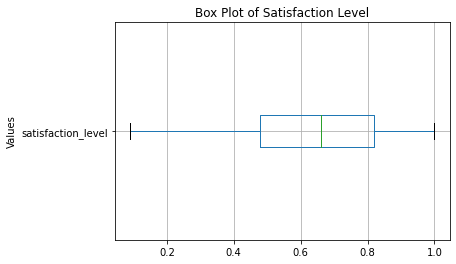

In [8]:
# Create a box plot for satisfaction level column
df.boxplot(column='satisfaction_level', vert=False)

# Display the plot
plt.title('Box Plot of Satisfaction Level')
plt.ylabel('Values')
plt.show()

### Satisfation level has moderate left skewness

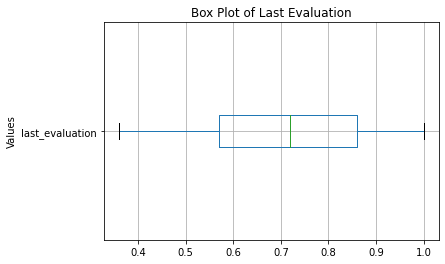

In [9]:
# Create a box plot for last evaluation column
df.boxplot(column='last_evaluation', vert=False)

# Display the plot
plt.title('Box Plot of Last Evaluation')
plt.ylabel('Values')
plt.show()

In [10]:
print(f'Last Eval Data Skewness: {np.round(df["last_evaluation"].skew(), 3)}')

Last Eval Data Skewness: -0.032


In [11]:
projects = df["number_project"].value_counts()
projects

4    3685
3    3520
5    2233
2    1582
6     826
7     145
Name: number_project, dtype: int64

In [12]:
df["average_montly_hours"].mode()

0    149
1    156
dtype: int64

We have bimodal data

In [13]:
dep = df["Department"].value_counts()
dep

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: Department, dtype: int64

In [14]:
promotion = df["promotion_last_5years"].value_counts()
promotion

0    11788
1      203
Name: promotion_last_5years, dtype: int64

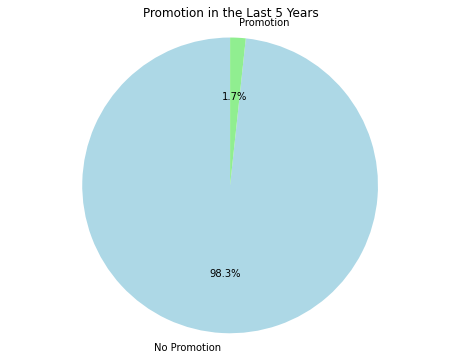

In [15]:
plt.figure(figsize=(8, 6))
plt.pie(promotion, labels=promotion.index.map({0: 'No Promotion', 1: 'Promotion'}), autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])
plt.title('Promotion in the Last 5 Years')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [16]:
salary = df["salary"].value_counts()
salary

low       5740
medium    5261
high       990
Name: salary, dtype: int64

In [17]:
left = df["left"].value_counts(normalize=True)*100
left

0    83.39588
1    16.60412
Name: left, dtype: float64

### For each department, what is the ratio of employees who left the company compared to those who didn't leave?

In [18]:
# Group by 'Department' and 'left' and count occurrences
emp_left_by_dept = df.groupby(['Department', 'left']).size().reset_index(name='count')

# Group by 'Department' to get total counts per department
total_counts = df.groupby('Department').size().reset_index(name='total_count')

# Merge the total counts with the grouped DataFrame
emp_left_by_dept_percent = pd.merge(emp_left_by_dept, total_counts, on='Department')

# Calculate the percentage and round to two decimal places
emp_left_by_dept_percent['percentage'] = (emp_left_by_dept_percent['count'] / emp_left_by_dept_percent['total_count']) * 100
emp_left_by_dept_percent['percentage'] = emp_left_by_dept_percent['percentage'].round(2)

# Map the 'left' column to 'stay' and 'left'
emp_left_by_dept_percent['left'] = emp_left_by_dept_percent['left'].map({1: 'stay', 0: 'left'})

emp_left_by_dept_percent

,Department,left,count,total_count,percentage
0,IT,left,818,976,83.81
1,IT,stay,158,976,16.19
2,RandD,left,609,694,87.75
3,RandD,stay,85,694,12.25
4,accounting,left,512,621,82.45
5,accounting,stay,109,621,17.55
6,hr,left,488,601,81.20
7,hr,stay,113,601,18.80
8,management,left,384,436,88.07
9,management,stay,52,436,11.93


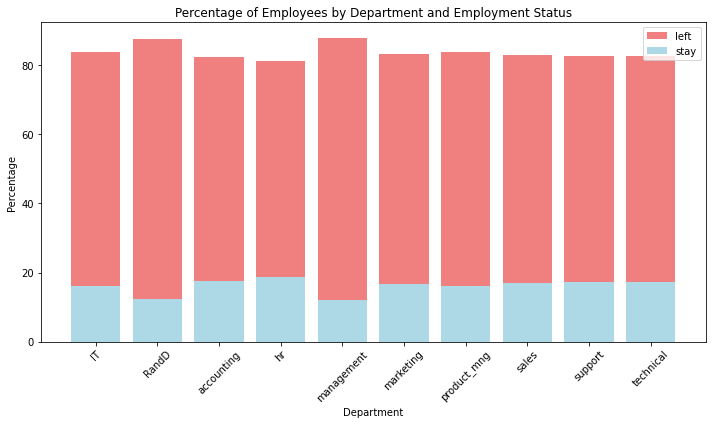

In [19]:
plt.figure(figsize=(10, 6))
colors = {'stay': 'lightblue', 'left': 'lightcoral'}
for left_type in emp_left_by_dept_percent['left'].unique():
    subset = emp_left_by_dept_percent[emp_left_by_dept_percent['left'] == left_type]
    plt.bar(subset['Department'], subset['percentage'], label=left_type, color=colors[left_type])

plt.xlabel('Department')
plt.ylabel('Percentage')
plt.title('Percentage of Employees by Department and Employment Status')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
# Calculate value counts of 'left' column before grouping
left_counts = df['left'].value_counts()

# Group by 'Work_accident' and 'left' and count occurrences
work_accident_left = df.groupby(['Work_accident', 'left']).size().reset_index(name='count')

# Map numerical values to descriptive labels
work_accident_left['left'] = work_accident_left['left'].map({1: 'Left', 0: 'Stay'})
work_accident_left['Work_accident'] = work_accident_left['Work_accident'].map({1: 'Had Accident', 0: 'No Accident'})

# Display the result
work_accident_left

,Work_accident,left,count
0,No Accident,Stay,8255
1,No Accident,Left,1886
2,Had Accident,Stay,1745
3,Had Accident,Left,105


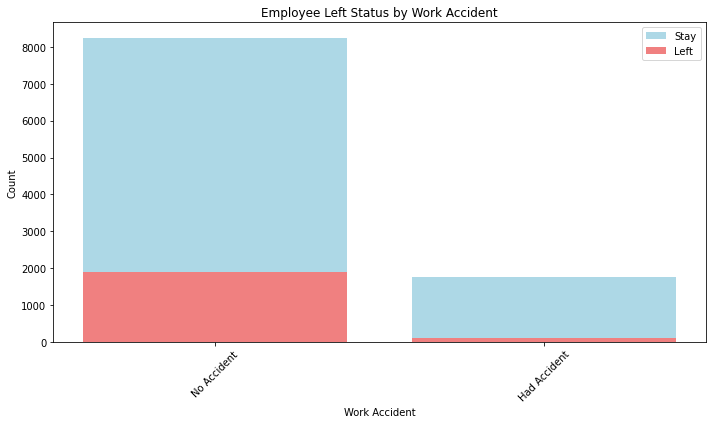

In [21]:
plt.figure(figsize=(10, 6))
colors = {'Left': 'lightcoral', 'Stay': 'lightblue'}

for left_type in work_accident_left['left'].unique():
    subset = work_accident_left[work_accident_left['left'] == left_type]
    plt.bar(subset['Work_accident'], subset['count'], label=left_type, color=colors[left_type])

plt.xlabel('Work Accident')
plt.ylabel('Count')
plt.title('Employee Left Status by Work Accident')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Accidents do not seem to have significant impact on employee retention

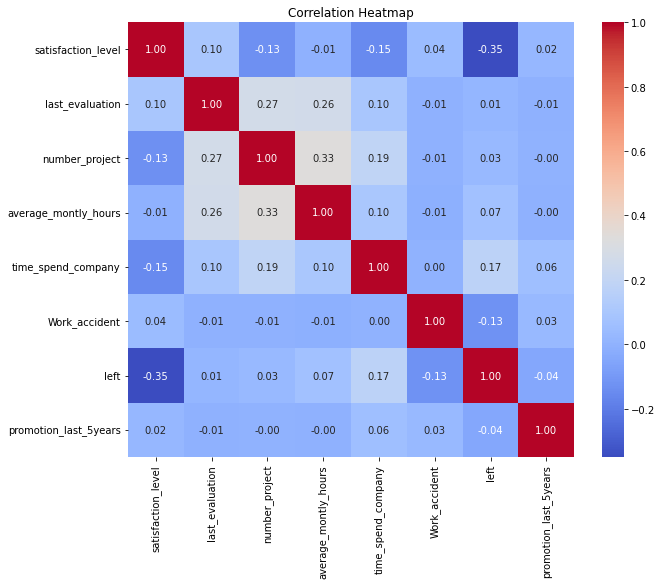

In [22]:
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

## Step 3. Model Building
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Model Building

1) Encode Categorical Data

In [23]:
df_encodded = pd.get_dummies(df, columns=['salary'], drop_first=True) *1

X = df_encodded.drop(columns= ["left", "Department", "Work_accident", "number_project", "promotion_last_5years"])
y = df_encodded["left"]

2) Split the data into training and testing sets

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
kf = KFold(n_splits=5, shuffle=True, random_state=31)

3) Build Model

In [25]:
model = RandomForestClassifier(n_estimators=150, random_state=45) # 500

4) Fit Model

In [26]:
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150, random_state=45)

5) Predictions

In [27]:
predictions = model.predict(X_test)

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




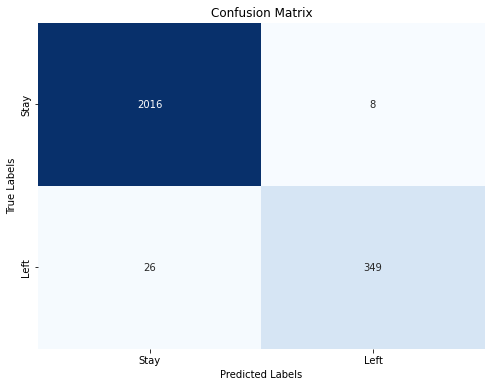

In [28]:
conf_matrix = confusion_matrix(y_test, predictions)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Stay', 'Left'], yticklabels=['Stay', 'Left'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

6) Clarep

In [29]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2024
           1       0.98      0.93      0.95       375

    accuracy                           0.99      2399
   macro avg       0.98      0.96      0.97      2399
weighted avg       0.99      0.99      0.99      2399

